In [4017]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4018]:
plt.rcParams['figure.dpi'] = 90

def ws(img_src: np.ndarray, cleaned_img: np.ndarray, dt_coef: float):
    # sure background area
    kernel = np.ones((3,3),np.uint8)
    sure_bg = cv2.dilate(cleaned_img, kernel, iterations=4)
    # k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    #sure_bg = cv2.dilate(cleaned_img, k3, iterations=4)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(sure_bg, cmap='gray')
    ax.set_title('sure_bg')
    
    # Finding sure foreground area
    dist_transform: np.ndarray = cv2.distanceTransform(cleaned_img, cv2.DIST_L2, 5)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(dist_transform, cmap='gray')
    ax.set_title('dist_transform')
    
    _, sure_fg = cv2.threshold(dist_transform, dt_coef * dist_transform.max(), 255, 0) ## dt coeff
    sure_fg = sure_fg.astype(np.uint8)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(sure_fg, cmap='gray')
    ax.set_title('sure_fg')
    
    # Finding unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(unknown, cmap='gray')
    ax.set_title('unknown region')
    
     # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(markers, cmap='jet')
    ax.set_title('markers')
    
    # Watershed!
    water_markers = cv2.watershed(img_src, markers)
    labels = np.unique(water_markers)
    borders = []
    for label in labels[2:]:
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        contours, _ = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        borders.append(contours[0])
    fig, ax = plt.subplots(1, 1)
    contours = cv2.drawContours(img_src.copy(), borders, -1, color=(0, 255, 0), thickness=2)
    ax.imshow(cv2.cvtColor(contours, cv2.COLOR_BGR2RGB))
    ax.set_title('result')

k14 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (14, 14))
k5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

Text(0.5, 1.0, 'grayscale')

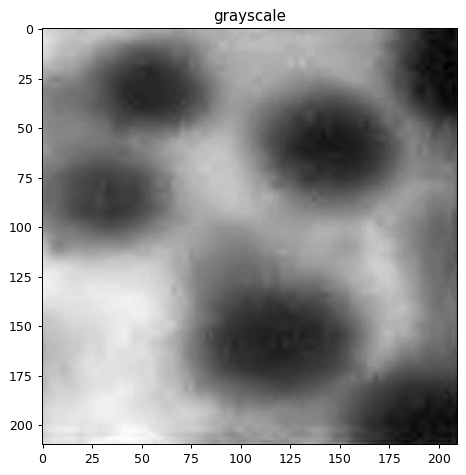

In [4019]:
first_path = './app-data/inputs/cells-01.png'
img_src = cv2.imread(first_path)
gs = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(gs, cmap='gray')
ax.set_title('grayscale')

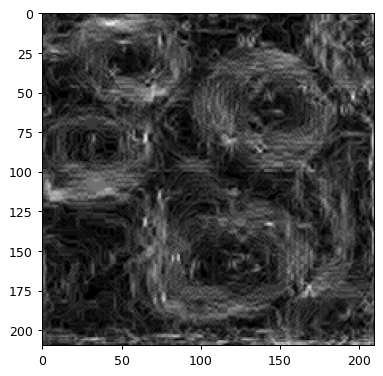

In [4020]:
k9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
cleaned_img = cv2.morphologyEx(gs, cv2.MORPH_GRADIENT, kernel=k9)
plt.imshow(cleaned_img, cmap='gray')

Text(0.5, 1.0, 'threshold')

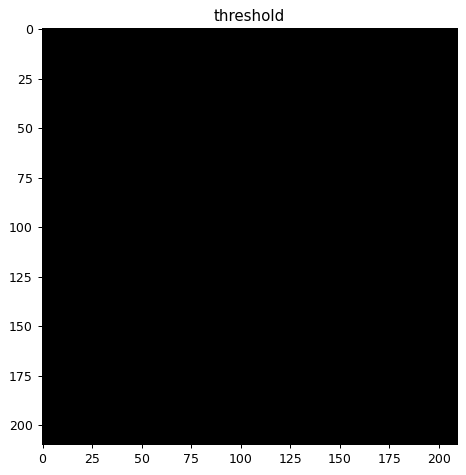

In [4021]:
ret, thresh = cv2.threshold(cleaned_img, 30, 255, type=cv2.THRESH_BINARY)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(thresh, cmap='gray')
ax.set_title('threshold')

In [4022]:
# # eliminate noise
cleaned_img = thresh.copy()
# opening_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
# cleaned_img = cv2.morphologyEx(cleaned_img,cv2.MORPH_OPEN,opening_kernel)   
# # eliminate holes
# close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
# cleaned_img = cv2.morphologyEx(cleaned_img,cv2.MORPH_CLOSE, close_kernel)
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.imshow(cleaned_img, cmap='gray')
# ax.set_title('eliminated noise & holes')

# Test image

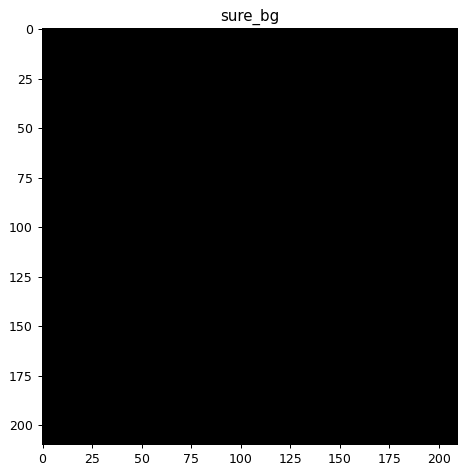

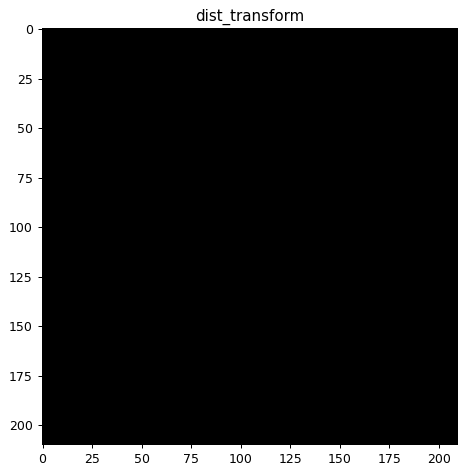

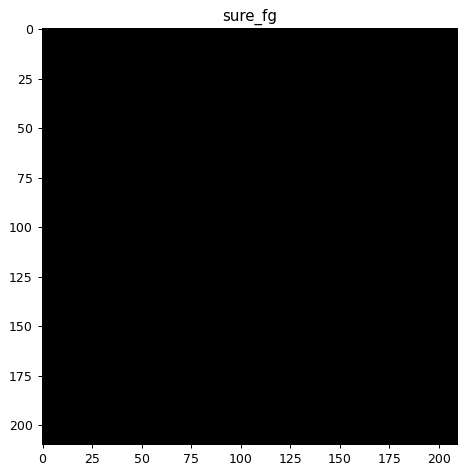

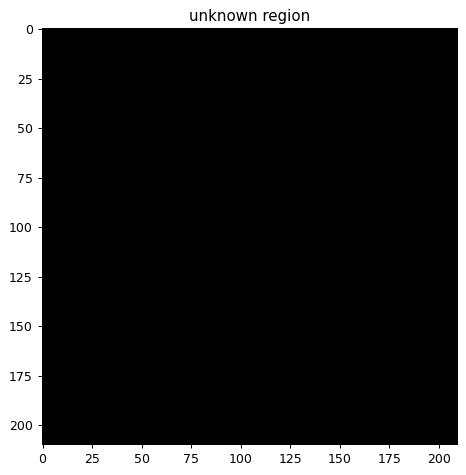

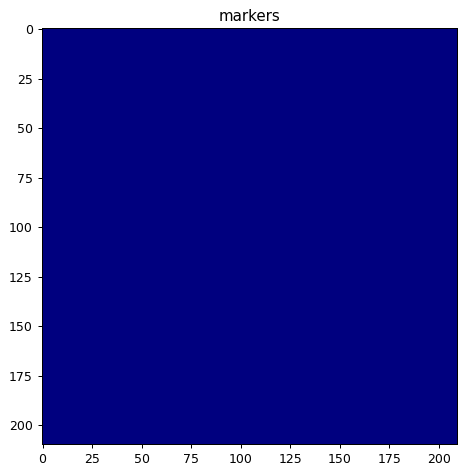

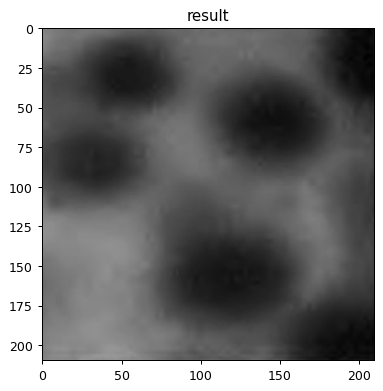

In [4023]:
ws(img_src, cleaned_img, 0.3)

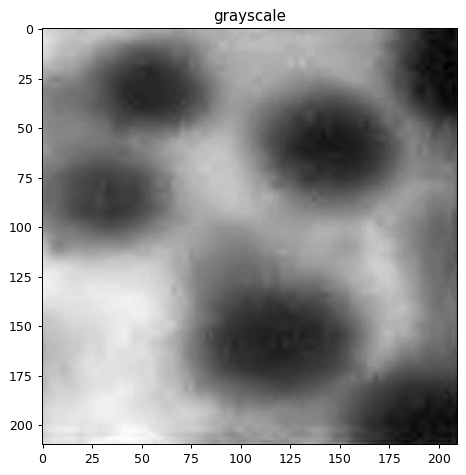

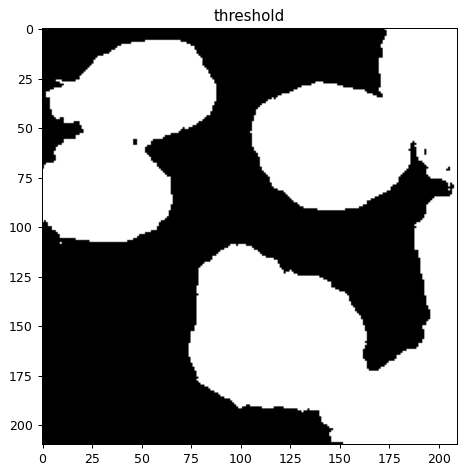

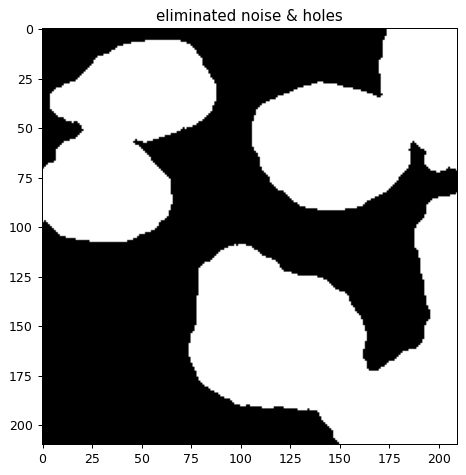

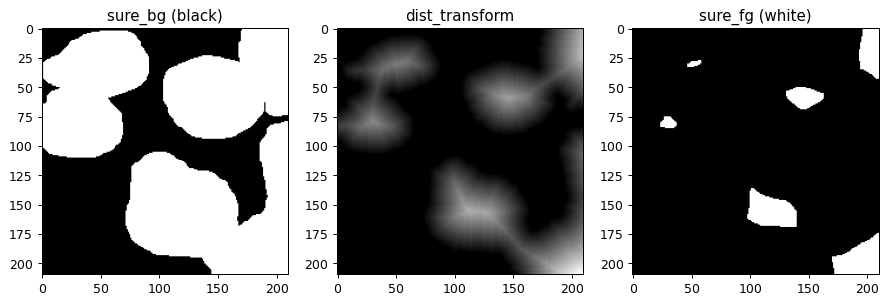

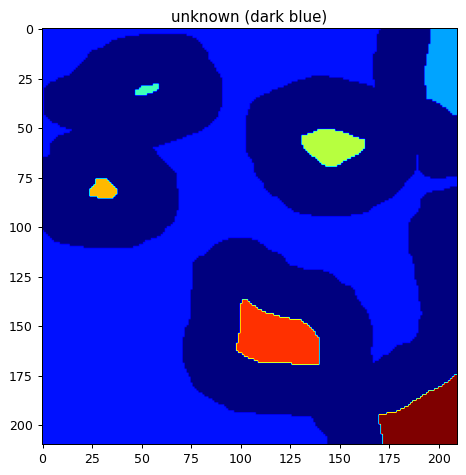

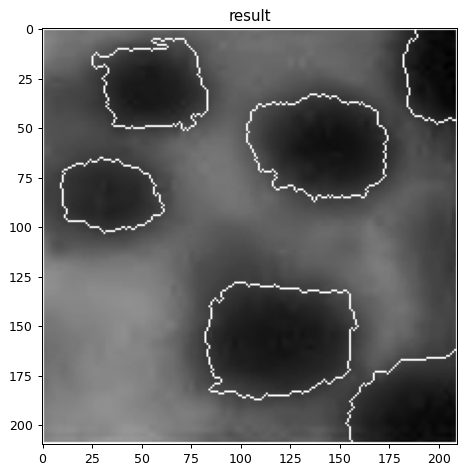

In [4024]:
first_path = './app-data/inputs/cells-01.png'
watershed(first_path)

# Image 02

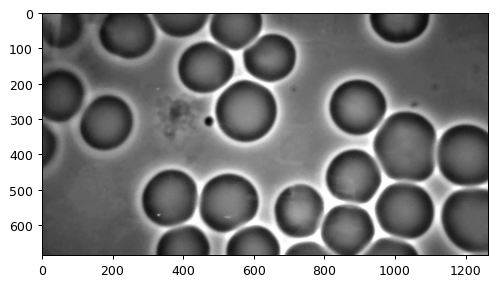

In [4025]:
second_path = './app-data/inputs/ws-02.jpg'
img_src = cv2.imread(second_path)
gs = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
plt.imshow(gs, cmap='gray')

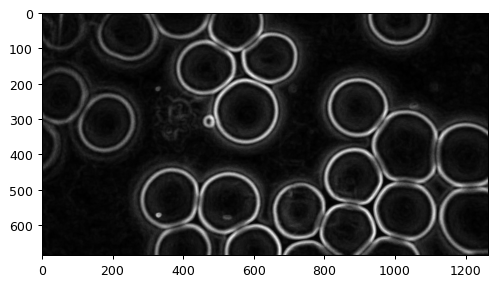

In [4026]:
k9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
cleaned_img = cv2.morphologyEx(gs, cv2.MORPH_GRADIENT, kernel=k9)
plt.imshow(cleaned_img, cmap='gray')

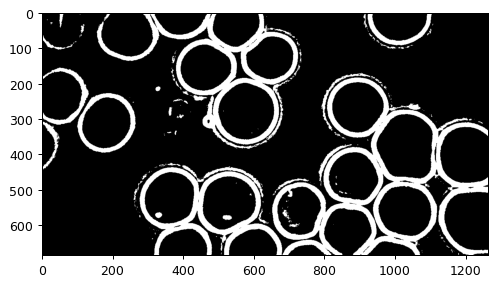

In [4027]:
ret, tres = cv2.threshold(cleaned_img, 30, 255, type=cv2.THRESH_BINARY)
plt.imshow(tres, cmap='gray')

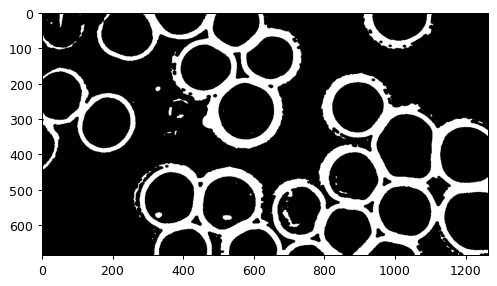

In [4028]:
cleaned_img = tres.copy()
cleaned_img = cv2.morphologyEx(tres,cv2.MORPH_CLOSE, k5, iterations=2)
plt.imshow(cleaned_img, cmap='gray')

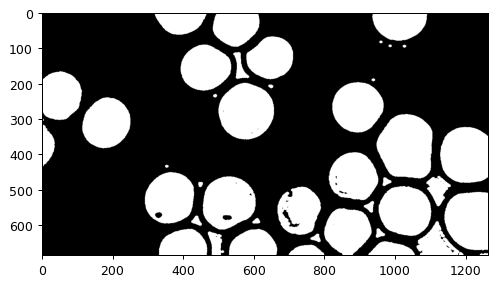

In [4029]:
cv2.bitwise_not(cleaned_img, cleaned_img)
cv2.floodFill(cleaned_img, None, (150, 150), 0)
plt.imshow(cleaned_img, cmap='gray')

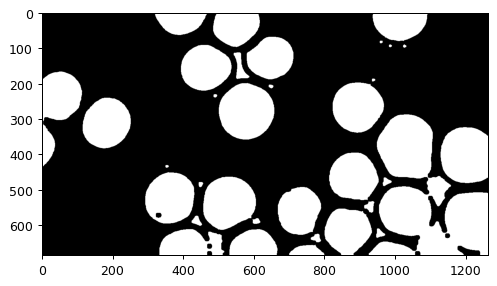

In [4030]:
cleaned_img = cv2.morphologyEx(cleaned_img,cv2.MORPH_CLOSE, k14, iterations=1)
plt.imshow(cleaned_img, cmap='gray')

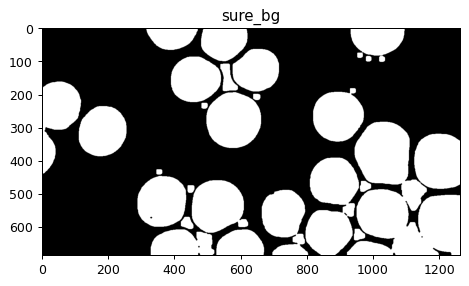

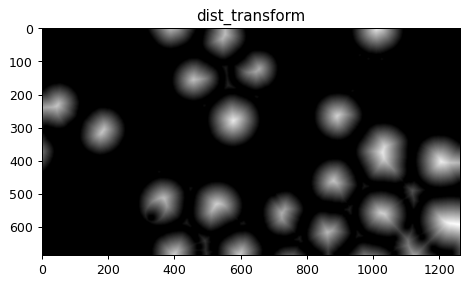

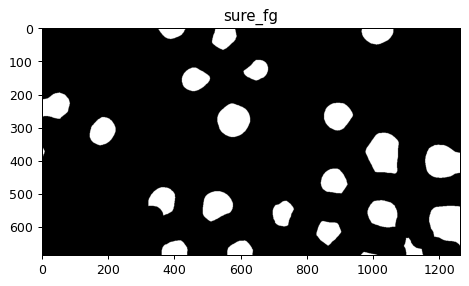

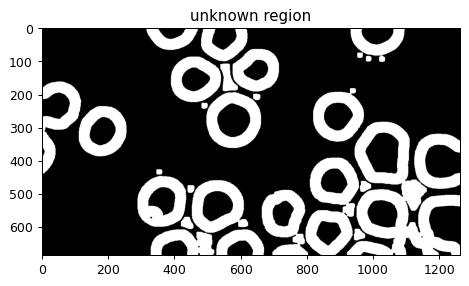

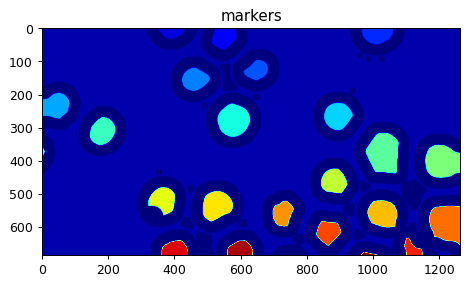

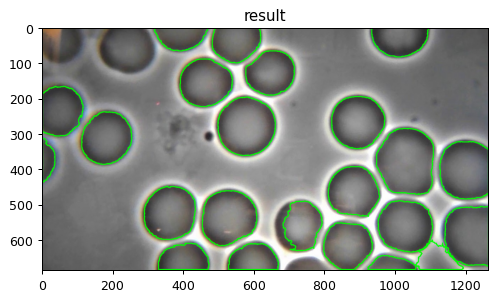

In [4031]:
ws(img_src, cleaned_img, 0.35)

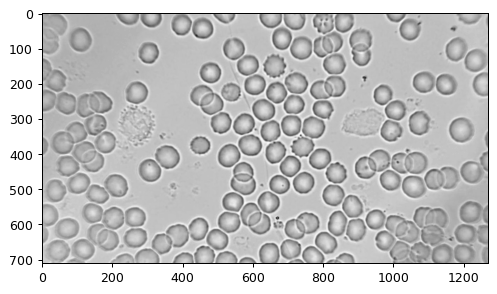

In [4032]:
plt.rcParams['figure.dpi'] = 90
third_path = './app-data/inputs/ws-03.jpg'
img_src = cv2.imread(third_path)
gs = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
plt.imshow(gs, cmap='gray')

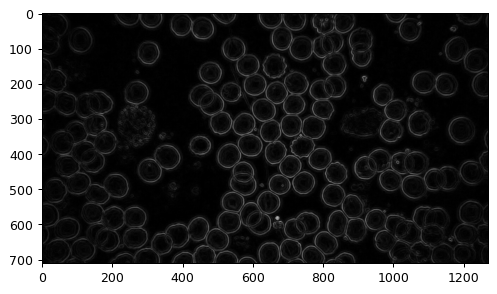

In [4033]:
k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
k5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
k7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
k8 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,8))
k9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))

cleaned_img = cv2.morphologyEx(gs, cv2.MORPH_GRADIENT, kernel=k3)
plt.imshow(cleaned_img, cmap='gray')

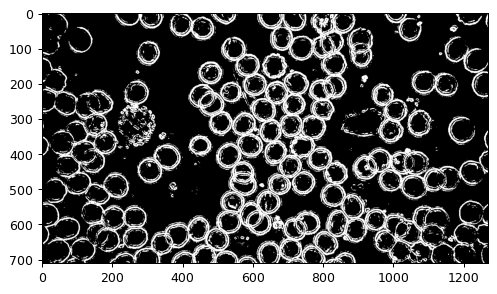

In [4034]:
ret, tres = cv2.threshold(cleaned_img, 14, 255, type=cv2.THRESH_BINARY)
plt.imshow(tres, cmap='gray')

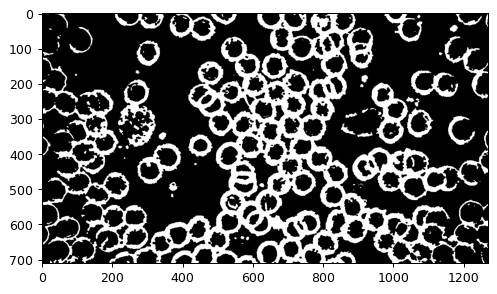

In [4035]:
cleaned_img = tres.copy()

cleaned_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_CLOSE, k5, iterations=1)
plt.imshow(cleaned_img, cmap='gray')

cleaned_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_OPEN, k3)
plt.imshow(cleaned_img, cmap='gray')

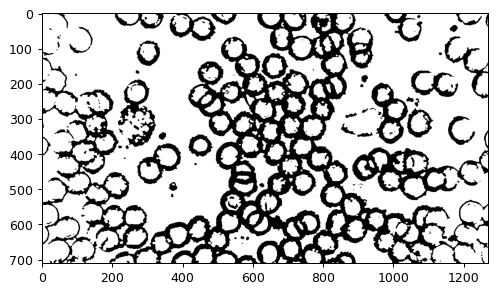

In [4036]:
cv2.bitwise_not(cleaned_img, cleaned_img)
plt.imshow(cleaned_img, cmap='gray')

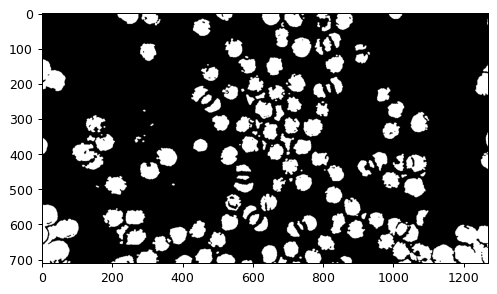

In [4037]:
cv2.floodFill(cleaned_img, None, (200, 100), 0)
cv2.floodFill(cleaned_img, None, (1000, 100), 0)
cv2.floodFill(cleaned_img, None, (750, 150), 0)

cv2.floodFill(cleaned_img, None, (900, 680), 0)
cv2.floodFill(cleaned_img, None, (780, 550), 0)

cv2.floodFill(cleaned_img, None, (600, 650), 0)
cv2.floodFill(cleaned_img, None, (100, 550), 0)
cv2.floodFill(cleaned_img, None, (620, 450), 0)
cv2.floodFill(cleaned_img, None, (180, 690), 0)
cv2.floodFill(cleaned_img, None, (20, 450), 0)
cv2.floodFill(cleaned_img, None, (350, 690), 0)
cv2.floodFill(cleaned_img, None, (550, 260), 0)
cv2.floodFill(cleaned_img, None, (780, 50), 0)

cv2.floodFill(cleaned_img, None, (750, 50), 0)
cv2.floodFill(cleaned_img, None, (750, 250), 0)
plt.imshow(cleaned_img, cmap='gray')

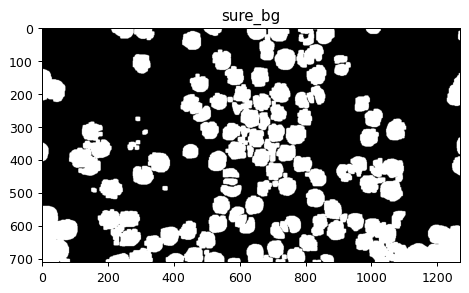

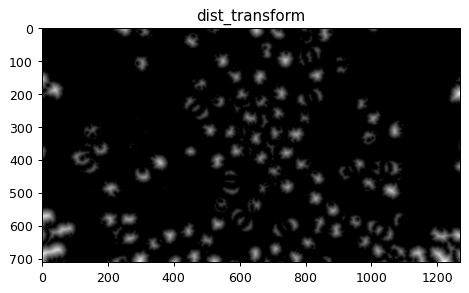

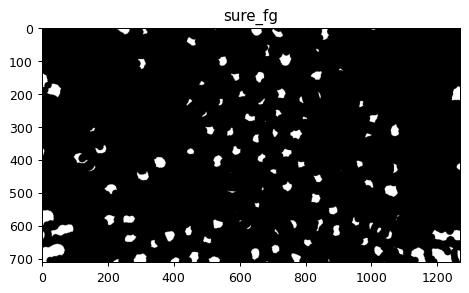

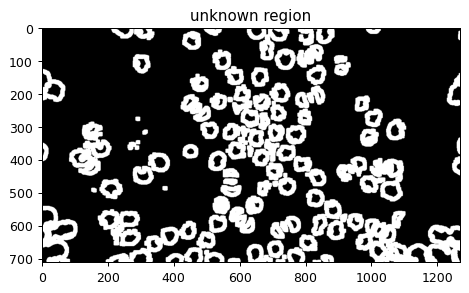

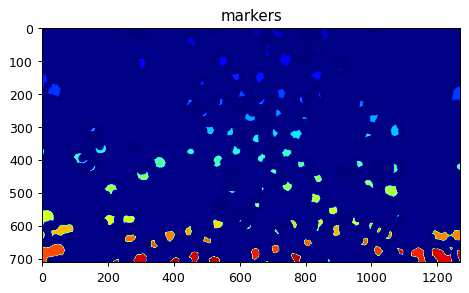

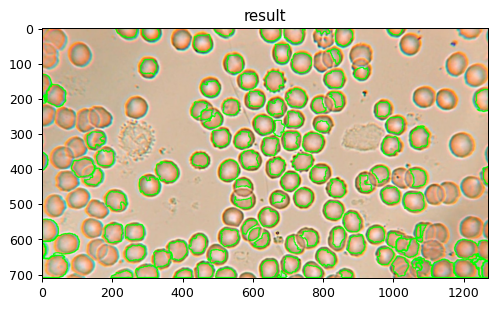

In [4038]:
ws(img_src, cleaned_img, 0.3)